In [1]:
# estamos

## PARTE I: ANALIZANDO LA BASE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
#Bases Tizi
base_04_sucia = pd.read_stata(r"C:\Users\rolan\OneDrive\Tizi UdeSA\8- Ciencia de datos\Compu Casa\CC408-T1-4\TP3\Individual_t104.dta")
base_24_sucia = pd.read_excel(r"C:\Users\rolan\OneDrive\Tizi UdeSA\8- Ciencia de datos\Compu Casa\CC408-T1-4\TP3\usu_individual_T124.xlsx")

In [4]:
# Base Angie
#base_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/Individual_t104.dta')
#base_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/usu_individual_T124.xlsx')

#### PUNTO A. 
Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base.

In [5]:
# me quedo solo con los valores de CABA y GBA
base_04_filtrada = base_04_sucia.loc[base_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_24_filtrada = base_24_sucia.loc[base_24_sucia['AGLOMERADO'].isin([32, 33])]

In [6]:
# Obtener los nombres de las variables
nombres_variables04 = base_04_sucia.columns.tolist()
print(nombres_variables04)

# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()
print(nombres_variables24)

#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato
base_04_filtrada.columns = base_04_filtrada.columns.str.lower()
base_24_filtrada.columns = base_24_filtrada.columns.str.lower()

# veo si cambio
nombres_variables24 = base_24_filtrada.columns.tolist()
print(nombres_variables24)

['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [7]:
# concateno las bases
base_prelimpieza = pd.concat([base_24_filtrada, base_04_filtrada])
print(base_prelimpieza.columns.tolist())

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp

Las variables que vamos a usar son:
- CH04: Sexo
- CH06: Años
- CH07: Estado civil 
- CH08: Estado cobertura médica
- NIVEL_ED: Nivel educativo 
- ESTADO: Condicion de actividad
- CAT_INAC: Categoria de inactividad
- IPCF: Monto de ingreso per cápita familiar percibido en el mes de referencia

In [8]:
# como hay datos que tienen distintas etiquetas en las dos bases que concatenamos, tenemos que unificar renombrar las etiquetas de una de las bases asi se pueden tener todos los datos con el mismo valor
variables_interes = base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac"]]

for i in variables_interes:
    if i == "ch04": 
        base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
            'Mujer': 2,
            'Varón': 1})
    elif i == "ch06":
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
            '98 y más años' : 98, 
            'Menos de 1 año' : 0})
        # cambio el formato de los valores de esta columna porque la mitad estaba en float y la mitas en int
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].astype(int)
    elif i == "ch07":
        base_prelimpieza['ch07'] = base_prelimpieza['ch07'].replace({
            'Unido': 1, 
            'Casado': 2, 
            'Separado o divorciado': 3, 
            'Viudo': 4, 
            'Soltero': 5})
    elif i == "ch08":
        base_prelimpieza['ch08'] = base_prelimpieza['ch08'].replace({
            'Obra social (incluye PAMI)': 1,  
            'Mutual/Prepaga/Servicio de emergencia': 2,  
            'Planes y seguros públicos': 3,  
            'No paga ni le descuentan': 4,  
            'Ns./Nr.': 9,  
            'Obra social y mutual/prepaga/servicio de emergencia': 12,  
            'Obra social y planes y seguros públicos': 13,  
            'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
            'Obra Social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123})
    elif i == "nivel_ed":
        base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].replace({
            'Primaria Incompleta (incluye educación especial)': 1,  
            'Primaria Completa': 2,  
            'Secundaria Incompleta': 3,  
            'Secundaria Completa': 4,  
            'Superior Universitaria Incompleta': 5,  
            'Superior Universitaria Completa': 6, 
            'Sin instrucción': 7,  
            'Ns./Nr.': 9})
    elif i == "estado":
        base_prelimpieza['estado'] = base_prelimpieza['estado'].replace({
            'Ocupado': 1,  
            'Desocupado': 2,  
            'Inactivo': 3,  
            'Menor de 10 años': 4,  
            'Entrevista individual no realizada (no respuesta al cuestion': 0})
    elif i == "cat_inac":
        base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].replace({
            0.0 : 0,
            'Jubilado/pensionado': 1,  
            'Rentista': 2,  
            'Estudiante': 3,  
            'Ama de casa': 4,  
            'Menor de 6 años': 5,  
            'Discapacitado': 6,  
            'Otros': 7})
    conteo = base_prelimpieza.groupby(i).size()
    print("\n", "La cantidad de datos en la variable", i, "por valor de etiqueta", "\n", conteo)


 La cantidad de datos en la variable ch04 por valor de etiqueta 
 ch04
1    6973
2    7725
dtype: int64

 La cantidad de datos en la variable ch06 por valor de etiqueta 
 ch06
-1      51
 0     131
 1     180
 2     198
 3     191
      ... 
 94      4
 95      2
 96      4
 97      1
 98      4
Length: 100, dtype: int64

 La cantidad de datos en la variable ch07 por valor de etiqueta 
 ch07
1    2118
2    3879
3     797
4     829
5    7062
9      13
dtype: int64

 La cantidad de datos en la variable ch08 por valor de etiqueta 
 ch08
1     7876
2     1176
3       49
4     5321
9       36
12     232
13       3
23       5
dtype: int64

 La cantidad de datos en la variable nivel_ed por valor de etiqueta 
 nivel_ed
1    2273
2    2374
3    2790
4    2696
5    1583
6    1755
7    1227
dtype: int64

 La cantidad de datos en la variable estado por valor de etiqueta 
 estado
0      51
1    6303
2     839
3    5462
4    2043
dtype: int64

 La cantidad de datos en la variable cat_inac por valor

C:\Users\rolan\AppData\Local\Temp\ipykernel_14060\3158200029.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
C:\Users\rolan\AppData\Local\Temp\ipykernel_14060\3158200029.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
C:\Users\rolan\AppData\Local\Temp\ipykernel_14060\3158200029.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

In [9]:
#sneak peek de como queda la base toda con datos numericos
print(base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac"]])

      ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac
245      2    85     4     1         2       1         0
246      1    59     2     1         6       1         0
247      2    57     2     1         6       1         0
255      1    26     5     1         6       1         0
256      2    88     4     1         1       3         1
...    ...   ...   ...   ...       ...     ...       ...
7642     2     1     5     2         7       4         5
7643     1    51     2     1         2       1         0
7644     2    55     2     1         2       1         0
7645     2    12     5     1         1       3         3
7646     1    22     5     1         4       1         0

[14698 rows x 7 columns]


### PUNTO B 
Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [10]:
# VALORES NEGATIVOS EN EDAD

valores_negativos_edad = base_prelimpieza['ch06'] < 0
# cantidad de datos negativos
cantidad_negativos_edad = valores_negativos_edad.sum()
print("Cantidad de valores negativos en variable edad:", cantidad_negativos_edad)

# me quedo con los valores mayores o iguales a 0 de edad
base_limpia = base_prelimpieza[base_prelimpieza['ch06'] >= 0]

# Calcular cada estadística por separado
count_ch06 = base_limpia['ch06'].count()
mean_ch06 = base_limpia['ch06'].mean()
std_ch06 = base_limpia['ch06'].std()
min_ch06 = base_limpia['ch06'].min()
max_ch06 = base_limpia['ch06'].max()

# Mostrar las estadísticas
print(f"cantidad: {count_ch06}")
print(f"media: {mean_ch06:.2f}")
print(f"desviacion estandar: {std_ch06:.2f}")
print(f"minimo: {min_ch06:.2f}")
print(f"maximo: {max_ch06:.2f}")

Cantidad de valores negativos en variable edad: 51
cantidad: 14647
media: 35.79
desviacion estandar: 22.82
minimo: 0.00
maximo: 98.00


In [11]:
# VALORES NEGATIVOS EN INGRESO POR CIRCULO FAMILIAR

valores_negativos_ipcf = base_limpia[base_limpia['ipcf'] < 0]
# cantidad de datos negativos
cantidad_negativos_ipcf = len(valores_negativos_ipcf)
# Mostrar resultados
print("Cantidad de valores negativos en variable ipcf:", cantidad_negativos_ipcf)

# me quedo con los valores mayores o iguales a 0. Como no hay valores negativos, no saca ninguno
base_limpia = base_prelimpieza[base_prelimpieza['ipcf'] >= 0]


# PORQUE ESTAN ESTAS ACA? NOS SIRVEN PARA EL PUNTO ES

# Calcular cada estadística por separado
count_ipcf = base_limpia['ipcf'].count()
mean_ipcf = base_limpia['ipcf'].mean()
std_ipcf = base_limpia['ipcf'].std()
min_ipcf = base_limpia['ipcf'].min()
max_ipcf = base_limpia['ipcf'].max()

# Mostrar las estadísticas
print(f"cantidad: {count_ipcf}")
print(f"media: {mean_ipcf:.2f}")
print(f"desvio estandar: {std_ipcf:.2f}")
print(f"minimo: {min_ipcf:.2f}")
print(f"maximo: {max_ipcf:.2f}")

Cantidad de valores negativos en variable ipcf: 0
cantidad: 14698
media: 76978.86
desvio estandar: 278296.61
minimo: 0.00
maximo: 11312333.33


In [12]:
# Dice que no se hizo la entrevista (h15 == 2)
h15_no = base_limpia[base_limpia['h15'] == 2]
respuestas = h15_no[['h15','ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
print(respuestas)

      h15  ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac  ipcf
399     2     2    49     2     4         2       0         0   0.0
400     2     2    25     5     4         6       0         0   0.0
401     2     1    20     5     4         5       0         0   0.0
409     2     1    74     5     2         5       0         0   0.0
410     2     1    21     9     9         5       0         0   0.0
411     2     1    21     9     9         5       0         0   0.0
5564    2     1    77     1     1         3       0         0   0.0
15241   2     1    45     1     4         4       0         0   0.0
17096   2     1    45     2     2         6       0         0   0.0
19483   2     1    15     9     9         3       0         0   0.0
19484   2     1    53     9     9         2       0         0   0.0
19485   2     1    15     9     9         3       0         0   0.0
19486   2     1    15     9     9         3       0         0   0.0
19597   2     2    38     9     9         4     

In [13]:

# SI COINCIDE LO QUE PONE EN CH12 (cual es el nivel mas alto que cursa o curso) CON NIVEL_ED (nivel educativo)


### PUNTO C
Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

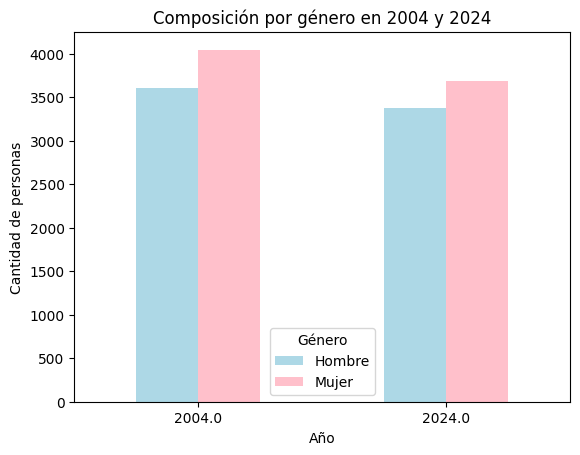

In [14]:
# Grafico de cantidad de hombres y mujeres por año
composicion = base_limpia.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
composicion.plot(kind ='bar', color=['lightblue', 'pink'])
plt.title('Composición por género en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation = 0)  # Para tener las etiquetas en horizontal
plt.legend(title = 'Género', labels=['Hombre', 'Mujer'])
plt.show()

#### PUNTO D
Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de correlación. Comenten los resultados

In [15]:
# Lista de variables para al correlacion: no uso las categoricas per se, sino las modificadas
variables_corr =  base_limpia[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

<Axes: >

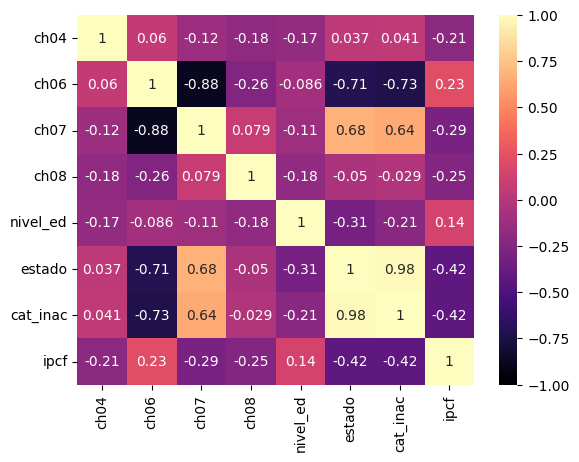

In [17]:
# lo saque del 2do link
matriz_corr = variables_corr.corr()
sns.heatmap(matriz_corr.corr(), vmin =- 1, vmax =+ 1, annot = True, cmap = "magma")

<Axes: >

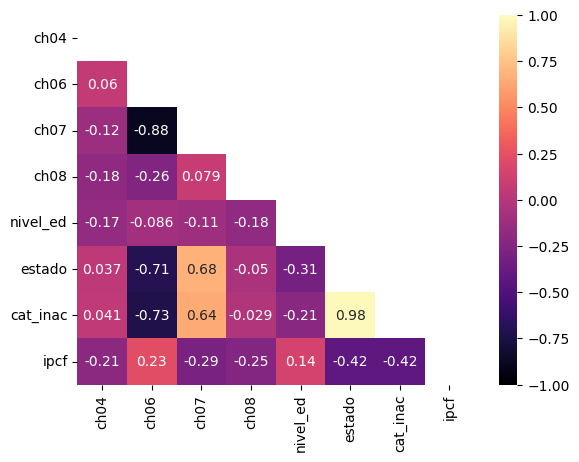

In [18]:
# lo saque del segundo link
upp_mat = np.triu(matriz_corr.corr())
sns.heatmap(matriz_corr.corr(), vmin=-1, vmax=+1, annot=True, cmap="magma", mask=upp_mat)

C:\Users\rolan\anaconda3\envs\Cienciadedatos\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\rolan\anaconda3\envs\Cienciadedatos\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


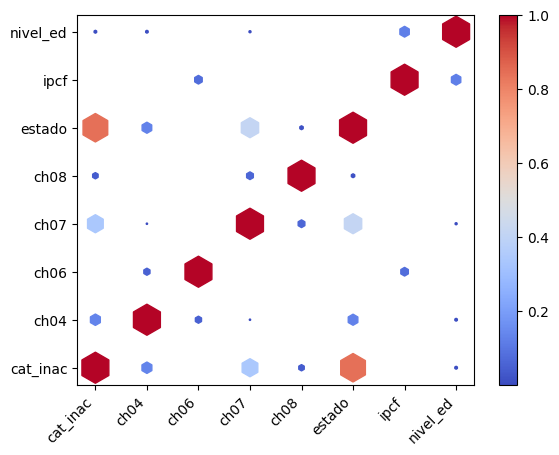

In [19]:
# lo saque del 1er link

# NO SE PORQUE NO PONE CORRELACIONES NEGATIVAS!!!!!!!!!

def heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    scatter = ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color,  # Colores de los puntos
        cmap='coolwarm',  # Mapa de colores
        marker='h' # usamos exagonos¿? creo que se llamaban asi
    )
    plt.colorbar(scatter, ax = ax)
    
    # Mostrar etiquetas de columnas en los ejes
    ax.set_xticks(list(x_to_num.values()))
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks(list(y_to_num.values()))
    ax.set_yticklabels(y_labels)

# hago el grafico
variables_corr = base_limpia[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
corr = variables_corr.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(x=corr['x'], y=corr['y'], size=corr['value'], color=corr['value'].abs())

#### PUNTO E
¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [20]:
#veo cantidad de desocupados
count_desocup = base_limpia[base_limpia['estado'] == 2].shape[0]
print(f"cantidad de desocupados: {count_desocup}")

# cantidad de inactivos
count_inact = base_limpia[base_limpia['estado'] == 3].shape[0]
print(f"cantidad de inactivos: {count_inact}")

mean_ipcf = base_limpia['ipcf'].mean()
print(f"media de ingreso per capita familiar general: {mean_ipcf}")

# NO SE COMO PODEMOS PONER LOS VALORES DE OCUPADO, DESOCUPADO, INACTIVO Y NO EL NUMERO
mean_ipcf_estado = base_limpia.groupby('estado')['ipcf'].mean()
print("media de ingreso per capita familiar segun estado:")
print(mean_ipcf_estado)

cantidad de desocupados: 839
cantidad de inactivos: 5462
media de ingreso per capita familiar general: 76978.85616342358
media de ingreso per capita familiar segun estado:
estado
0        10.300654
1    106443.404820
2     31655.957950
3     63863.080627
4     41675.196705
Name: ipcf, dtype: float64
